<h1> Descriptives Statistics of Sentiment Scores (VADER)</h1>

<h3>Packages & Options</h3>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

from scipy import stats

In [2]:
import dateutil as dtl

In [55]:
from collections import Counter

In [59]:
from wordcloud import WordCloud

In [65]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [3]:
pd.set_option('display.max_colwidth', -1)

sns.set(color_codes=True)

In [4]:
sns.set_palette("deep")

<h3>Data</h3>

In [5]:
df = pd.read_csv('20190406_AM_Data.csv')

In [25]:
#Data Window
df["authorLocation_new"].value_counts()

Not USA          42788
United States    42418
Name: authorLocation_new, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123524 entries, 0 to 123523
Data columns (total 26 columns):
authorFollower           123524 non-null int64
authorFriend             123286 non-null float64
authorID                 123524 non-null float64
authorID_original        9666 non-null float64
authorLang               123524 non-null object
authorLocation           85206 non-null object
authorPicture            123524 non-null object
authorScreen             123524 non-null object
authorScreen_original    9666 non-null object
tweetID                  123524 non-null int64
tweetID_original         9158 non-null float64
tweetMethod              123524 non-null object
tweetSentiment           123524 non-null float64
tweetText                123524 non-null object
tweetTimeDate            123524 non-null object
tweetURL                 123524 non-null object
authorLang_new           123524 non-null object
authorPicture_new        123524 non-null object
tweetMethod_new          1235

<h3>Distribution of dependent variables (sentiment)</h3>

In [8]:
df['tweetSentiment'].describe()

count    123524.000000
mean    -0.172064     
std      0.519971     
min     -0.988900     
25%     -0.632400     
50%     -0.102700     
75%      0.126000     
max      0.980800     
Name: tweetSentiment, dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


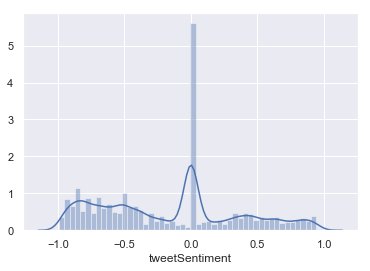

In [9]:
sns.distplot(df['tweetSentiment'])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


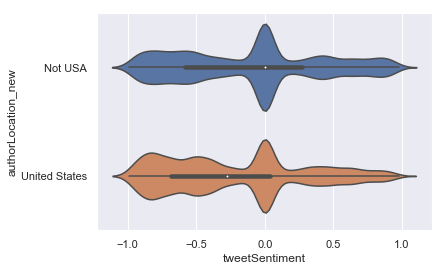

In [10]:
sns.violinplot(x=df['tweetSentiment'], y=df['authorLocation_new'])

In [11]:
df['tweetSentiment_cat'] = df['tweetSentiment_cat'].astype('category')

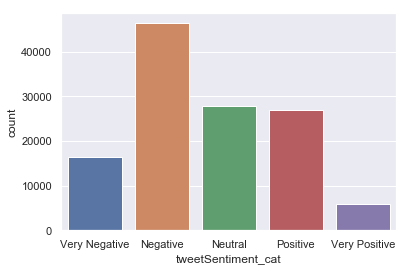

In [12]:
sns.countplot(df['tweetSentiment_cat'], order = ("Very Negative", "Negative", "Neutral", "Positive", "Very Positive"))

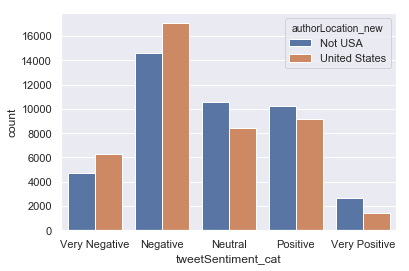

In [13]:
sns.countplot(x=df['tweetSentiment_cat'], hue=df['authorLocation_new'], order = ("Very Negative", "Negative", "Neutral", "Positive", "Very Positive"))

In [14]:
df['tweetTimeDate_new'] = df['tweetTimeDate'].apply(dtl.parser.parse, dayfirst=True)

In [15]:
df["tweetDate_new"] = pd.to_datetime(df['tweetDate_new'])

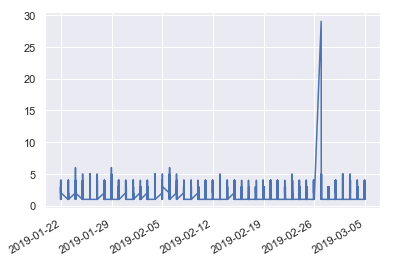

In [113]:
df["tweetTimeDate_new"].value_counts().plot()

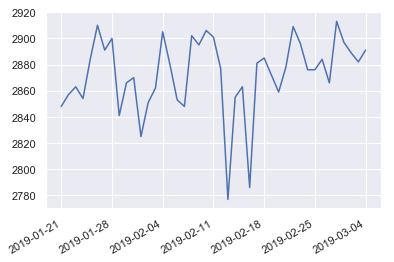

In [114]:
df["tweetDate_new"].value_counts().plot()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


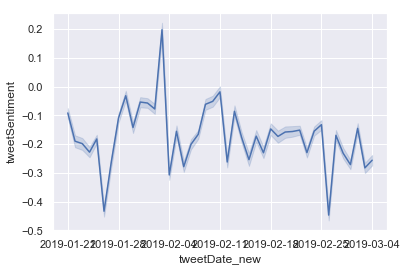

In [116]:
g = sns.lineplot(x=df['tweetDate_new'], y=df["tweetSentiment"])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


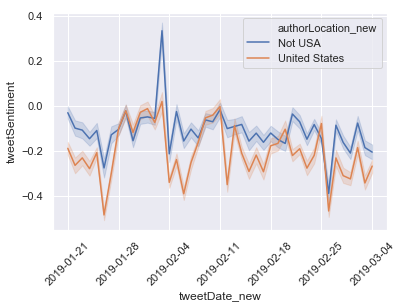

In [38]:
g = sns.lineplot(x=df['tweetDate_new'], y=df["tweetSentiment"], hue=df["authorLocation_new"]).set_xticklabels(g.get_xticklabels(), rotation=45)

<h3>Build Word Clouds for the spike periods shown above.</h3>

In [108]:
dates = ['2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03', '2019-02-04']
tweets = df[df.tweetDate_new.isin(dates)]["tweetText"]

In [67]:
#Sunyam's code in "Tweets-Analysis"
languages = ['english']

STOPWORDS = []
for lang in languages:
    STOPWORDS.extend(stopwords.words(lang))

# Stopwords that I came across: amp represents '&' and "n't" is not
custom_stopwords = ["amp", "n't", "rt", "http", "https"]

STOPWORDS.extend(custom_stopwords)
print("We have a total of {} words.".format(len(STOPWORDS)))

We have a total of 184 words.


In [109]:
#Sunyam's code in "Tweets-Analysis"
# split sentences to get individual words
all_words = []

for tweet in tweets:
    words = word_tokenize(tweet)
    
    for w in words:
        word = w.lower() # change to lowercase
            
        if word[0].isalpha() and word not in STOPWORDS: # skip non-words and skip stopwords
            all_words.append(word)

<h3>Word Cloud for positive spike observed on January 29 to February 3, 2019.

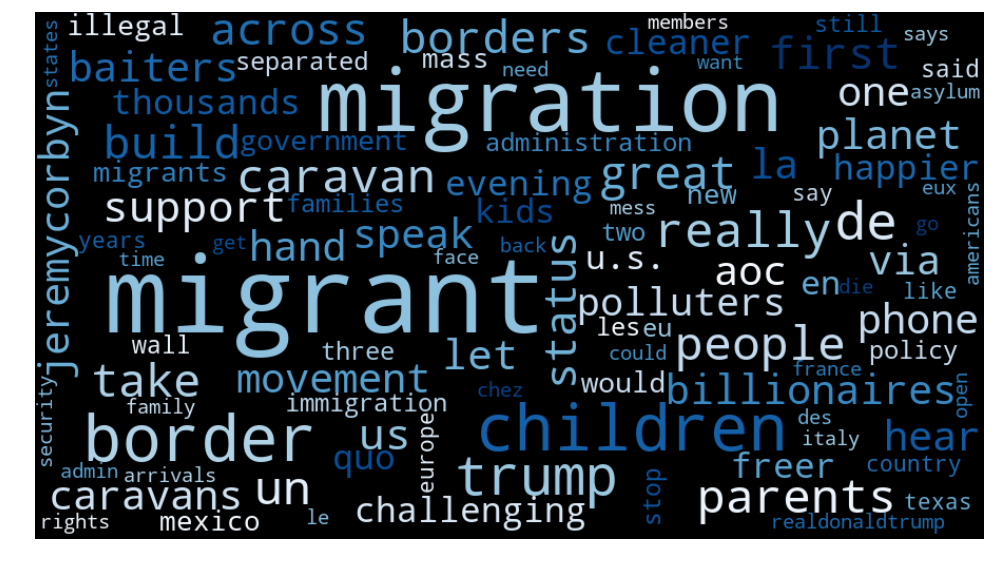

In [110]:
# Source of this code is https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=100,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3>Word Cloud for positive spikes observed around January 23 and February 26.</h3>

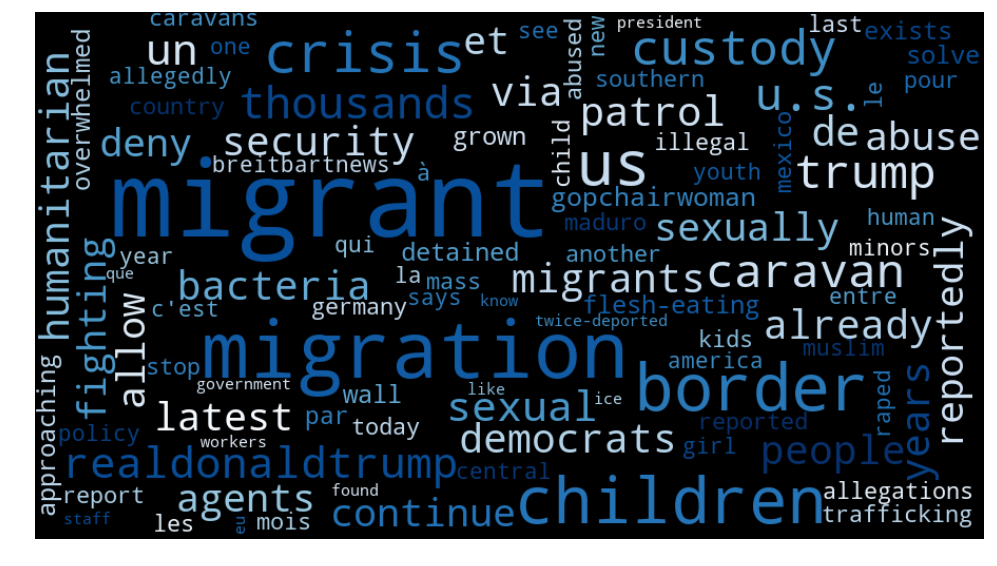

In [107]:
# Source of this code is https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb
# create a word frequency dictionary
wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=100,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()